In [1]:
from fastai.vision.all import *

In [2]:
path = Path('newdata/train')

In [3]:
fnames = get_image_files(path)
def label_func(x): return x.parent.name

In [4]:
dls = ImageDataLoaders.from_path_func(path, fnames, label_func, item_tfms=Resize(94))

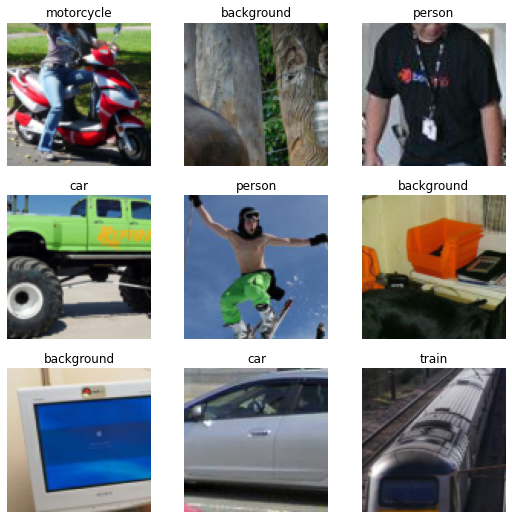

In [5]:
dls.show_batch()

In [6]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

/home/ubuntu/miniconda3/envs/fastai2/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448278899/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


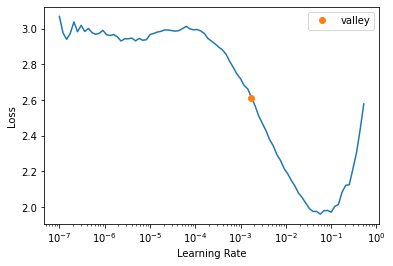

In [7]:
"""
run out of memory if you run this line
valley=0.000478630099678412

"""
lr = learn.lr_find()[0]

In [8]:
learn.fine_tune(2, lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.415372,0.309962,0.898353,02:35


epoch,train_loss,valid_loss,accuracy,time
0,0.261000,0.202636,0.933800,02:54
1,0.164133,0.167214,0.946521,02:53


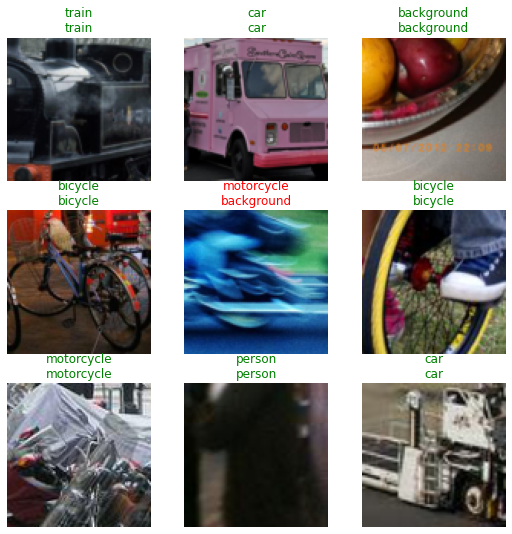

In [9]:
learn.show_results()

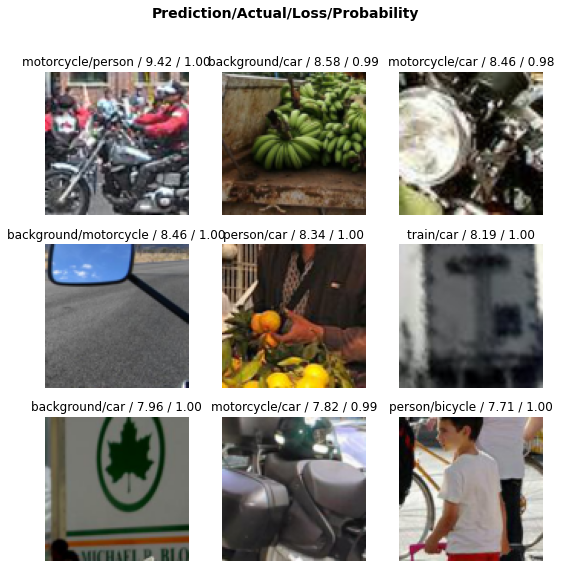

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9)

In [11]:
path_to_model = learn.save('fastai_model_1')

In [12]:

path_to_model

Path('newdata/train/models/fastai_model_1.pth')

In [13]:
learn.export('fastai_ex')

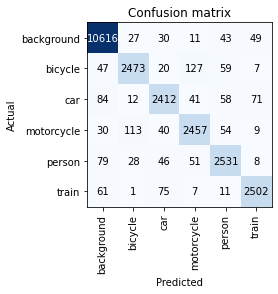

In [14]:
interp.plot_confusion_matrix()